In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv('/Users/printitta.t/Desktop/Data/⭕️Project/0. Done/Lifestyle and Health Risk Prediction/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv')

In [4]:
print(data.shape)
data.head()

(5000, 12)


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [5]:
print(data.isnull().sum())
print("Duplicates:", data.duplicated().sum())

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64
Duplicates: 0


In [6]:
cat_cols = ['exercise', 'sugar_intake', 'smoking', 'alcohol', 'married', 'profession', 'health_risk']
encoder = LabelEncoder()

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])


In [7]:
X = data.drop('health_risk', axis=1)
y = data['health_risk']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)


Accuracy: 0.987
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       708
           1       0.98      0.98      0.98       292

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



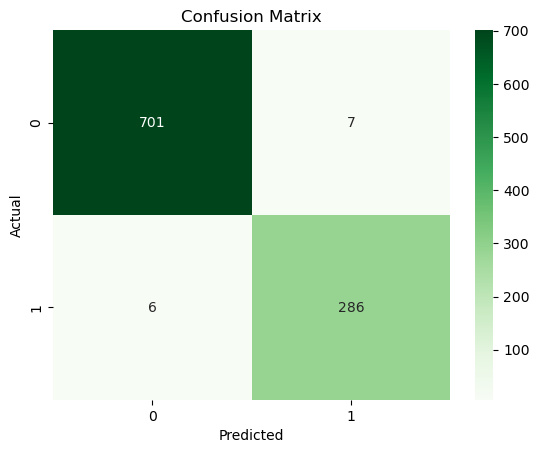

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


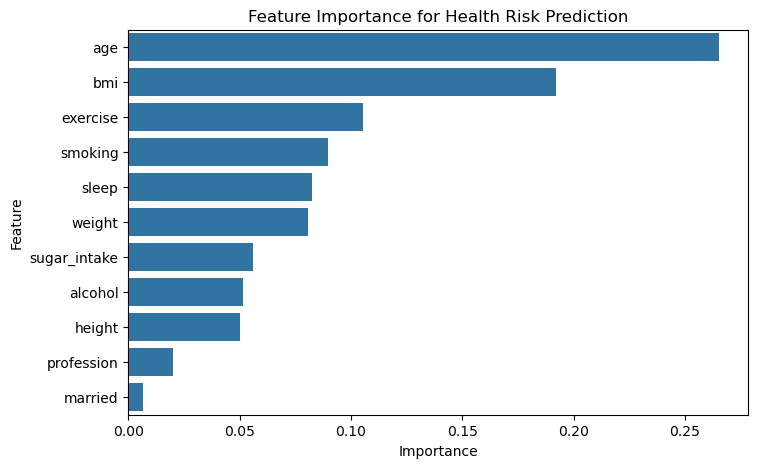

In [13]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance for Health Risk Prediction")
plt.show()